In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:

house =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Chapter10ANN/BostonHousing.csv" )
house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
X=house.drop("medv", axis=1)

In [5]:
y=house.medv

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
#sc_y=StandardScaler()
X=sc_x.fit_transform(X)
#y=sc_y.fit_transform(y)

#feature normalization
#X =  keras.utils.normalize(X.values)
print(X)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.2, random_state=0) 

In [8]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = Sequential()

model.add(Dense(150, activation='relu', 
                       input_shape=(n_cols,)))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               2100      
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-traina

In [9]:
from keras.callbacks import EarlyStopping
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=30) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/300
11/11 [==============================] - 3s 23ms/step - loss: 506.0175 - mae: 20.5768 - val_loss: 261.8039 - val_mae: 14.1311
Epoch 2/300
11/11 [==============================] - 0s 5ms/step - loss: 156.1505 - mae: 10.1466 - val_loss: 84.5010 - val_mae: 7.2220
Epoch 3/300
11/11 [==============================] - 0s 7ms/step - loss: 59.8235 - mae: 6.0327 - val_loss: 38.9723 - val_mae: 4.6799
Epoch 4/300
11/11 [==============================] - 0s 5ms/step - loss: 33.0520 - mae: 4.1736 - val_loss: 25.6891 - val_mae: 3.7282
Epoch 5/300
11/11 [==============================] - 0s 5ms/step - loss: 23.9085 - mae: 3.5710 - val_loss: 21.8201 - val_mae: 3.3151
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 18.0562 - mae: 3.0652 - val_loss: 20.5195 - val_mae: 3.3223
Epoch 7/300
11/11 [==============================] - 0s 5ms/step - loss: 15.5824 - mae: 2.8608 - val_loss: 17.0234 - val_mae: 2.9712
Epoch 8/300
11/11 [==============================] - 0s 6ms/st

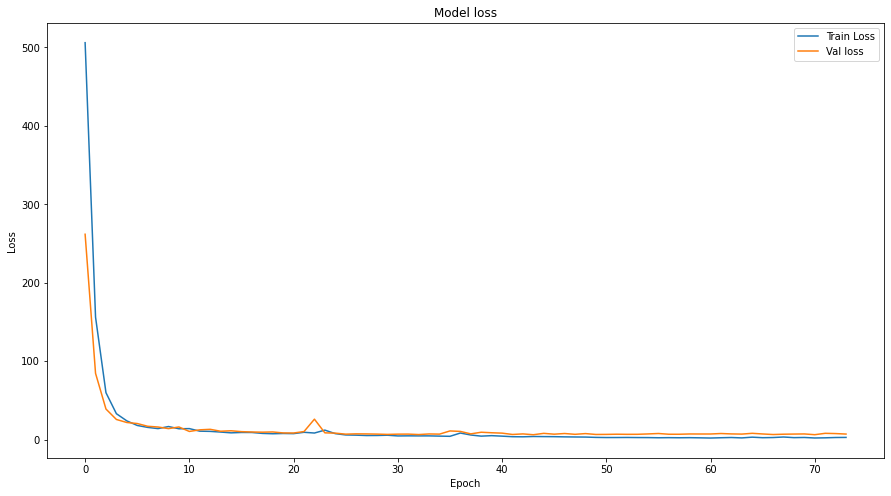

In [10]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Loss') #MSE
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

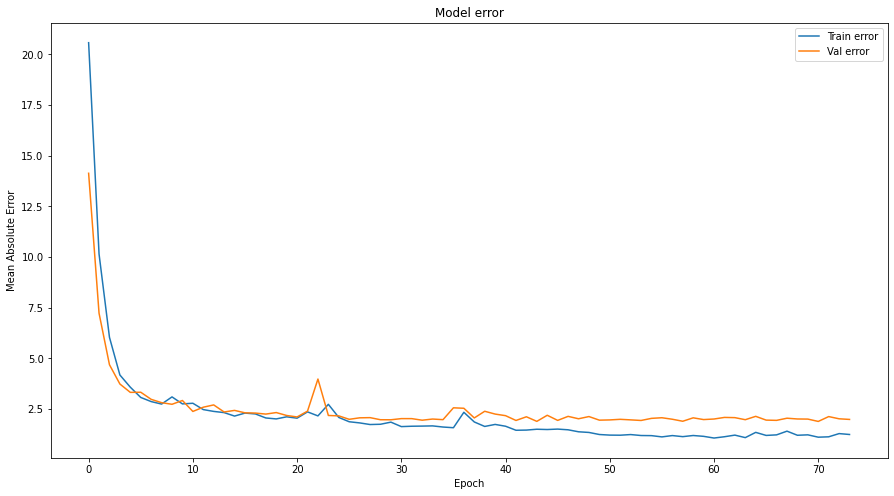

In [11]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(history.epoch, history.history['mae'],
           label='Train error')
plt.plot(history.epoch, history.history['val_mae'],
           label = 'Val error')
plt.title('Model error')
plt.legend()

In [12]:
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0]) #MSE
print('Mean absolute error: ', score[1])

4/4 [==============================] - 0s 4ms/step - loss: 21.9483 - mae: 3.0776
loss value:  21.94828224182129
Mean absolute error:  3.0775883197784424


In [13]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()

4/4 [==============================] - 0s 4ms/step


In [14]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.sample(10)

,True Value,Predicted Value
44,16.5,20.704359
16,23.0,23.480921
6,20.6,22.611464
29,18.7,17.310009
28,38.7,39.893513
53,42.8,43.647911
31,20.0,15.545883
62,33.1,33.849930
84,50.0,44.138569
79,18.3,16.530415


In [15]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)


Mean squared error on test data:  33.448979997676545
Mean absolute error on test data:  3.842909220444498


In [17]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error on test data: ', mse_RF)
print('Mean absolute error on test data: ', mae_RF)

Mean squared error on test data:  18.973554117647073
Mean absolute error on test data:  2.6621176470588264


In [19]:
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions,y_pred_lr, y_pred_RF)), 
                    columns=['True Value','Predicted Value_NN', 'Predicted Value_LR', 'Predicted Value_RF'])
true_predicted.sample(10)

,True Value,Predicted Value_NN,Predicted Value_LR,Predicted Value_RF
82,27.9,21.372072,18.971860,21.507
71,21.4,19.157516,24.025557,22.771
67,15.0,24.159033,19.786935,21.473
53,42.8,43.647911,29.951430,40.025
7,18.7,18.561699,21.360993,19.985
69,22.6,21.699501,22.898254,21.798
46,20.3,19.812819,20.114595,20.960
37,50.0,38.254890,24.575606,28.390
22,20.4,19.701298,20.595438,19.642
12,14.9,14.223360,17.077765,15.163
